# Configuring GPU for tensorflow 

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

You should consider upgrading via the 'E:\Projects\InsideCNNs\insidecnns\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.5.18.1
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.3
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.11.4
ipykernel                    6.13.0
ipython                      8.4.0
jedi                         0.18.1
jupy

You should consider upgrading via the 'E:\Projects\InsideCNNs\insidecnns\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Imports

In [6]:
import itertools
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
import keras

# Loading Xception Model

In [7]:
model = base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
)

In [8]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [9]:
intermediary_layers = model.layers[:5]
intermediary_model = Sequential(intermediary_layers)

In [10]:
intermediary_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 149, 149, 32)      864       
                                                                 
 block1_conv1_bn (BatchNorma  (None, 149, 149, 32)     128       
 lization)                                                       
                                                                 
 block1_conv1_act (Activatio  (None, 149, 149, 32)     0         
 n)                                                              
                                                                 
 block1_conv2 (Conv2D)       (None, 147, 147, 64)      18432     
                                                                 
Total params: 19,424
Trainable params: 19,360
Non-trainable params: 64
_________________________________________________________________


In [11]:
intermediary_model.input_shape

(None, 299, 299, 3)

In [12]:
image = cv2.imread('Photos/Bernese-mountain-dog-grass.webp')
resized_image = cv2.resize(image, (299,299))

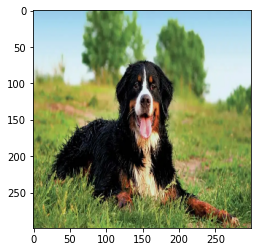

In [13]:
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [14]:
resized_image.shape

(299, 299, 3)

In [15]:
predictions = intermediary_model.predict(np.expand_dims(resized_image, 0))

1/1 [==============================] - 2s 2s/step


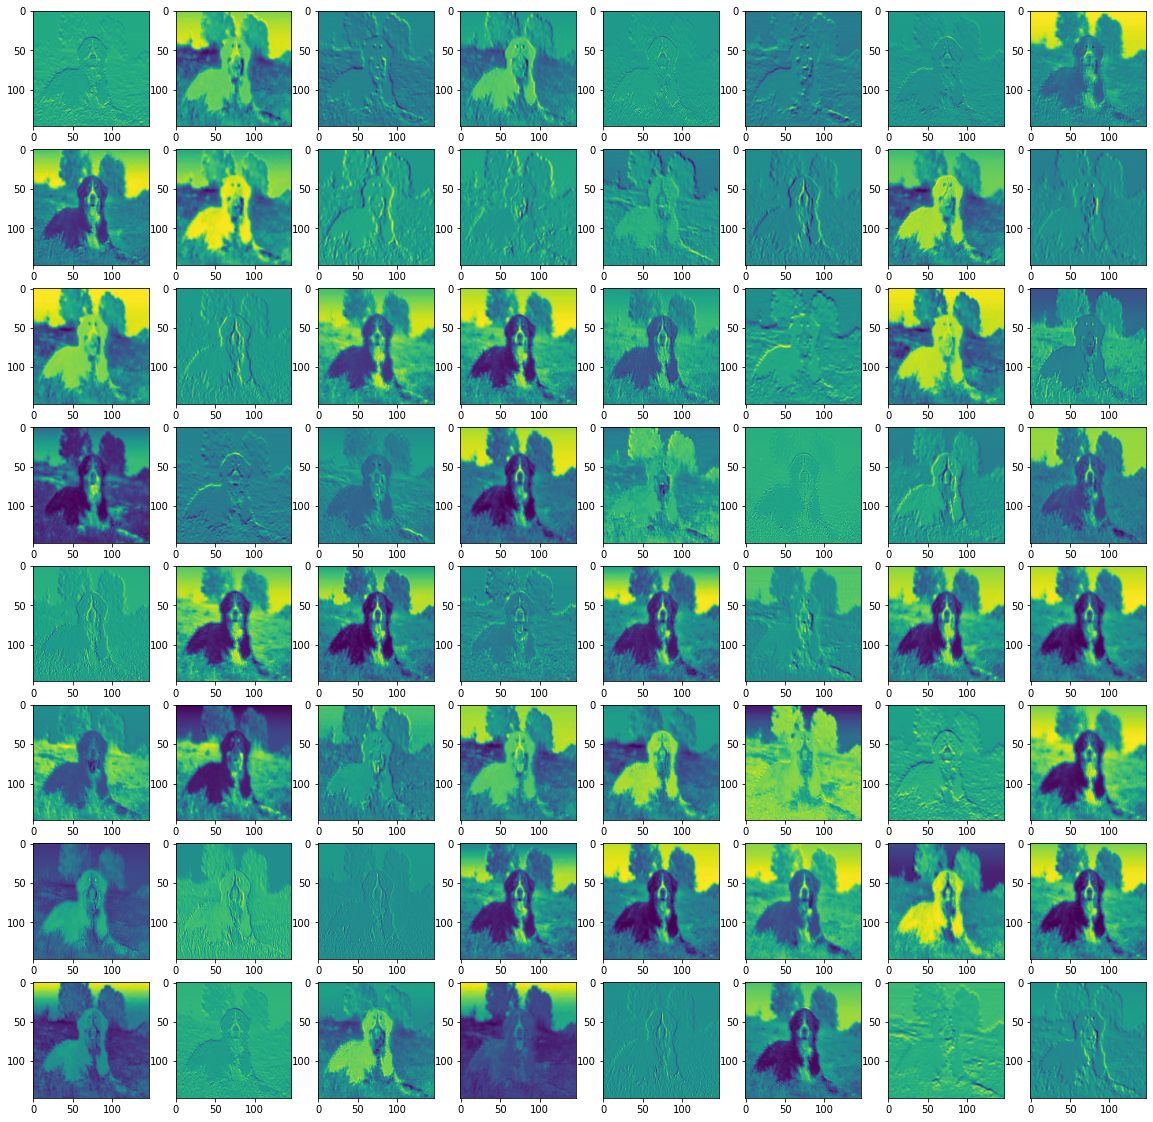

In [16]:
# 64 channels -> 8*8 grid
fig, ax = plt.subplots(ncols=8, nrows=8, figsize=(20,20))
for index, axis_index in enumerate(list(itertools.product(range(8), range(8)))):
    ax[axis_index[0], axis_index[1]].imshow(predictions[0, :, :, index])